In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [657]:
df = pd.read_csv(r"C:\PGA\Python\Machine Learning\Decision Tree\train_loan.csv")

In [658]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [659]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [660]:
df.drop("Loan_ID", axis=1, inplace=True)

In [661]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [662]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [663]:
df.isna().sum().sum()

np.int64(149)

In [664]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [665]:
nan_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [666]:
nan_cols

['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [667]:
for c in nan_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\1751487685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0], inplace=True)


In [668]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [669]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [670]:
df["Loan_Amount_Term"].isna().sum()

np.int64(14)

In [671]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\2887083334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)


In [672]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [673]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [674]:
df["LoanAmount"].nunique()

203

In [675]:
df["LoanAmount"].mean().round()

np.float64(146.0)

In [676]:
df["LoanAmount"].fillna(df["LoanAmount"].mean().round(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\2697549642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean().round(), inplace=True)


In [677]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### NaNs

In [678]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Error Detection

<Axes: >

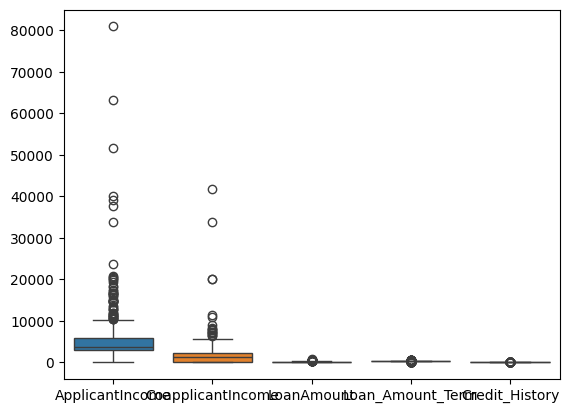

In [679]:
sns.boxplot(df)

<Axes: ylabel='LoanAmount'>

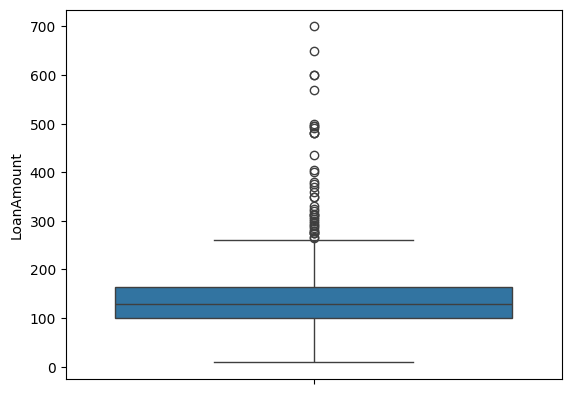

In [680]:
sns.boxplot(df["LoanAmount"])

<Axes: ylabel='Loan_Amount_Term'>

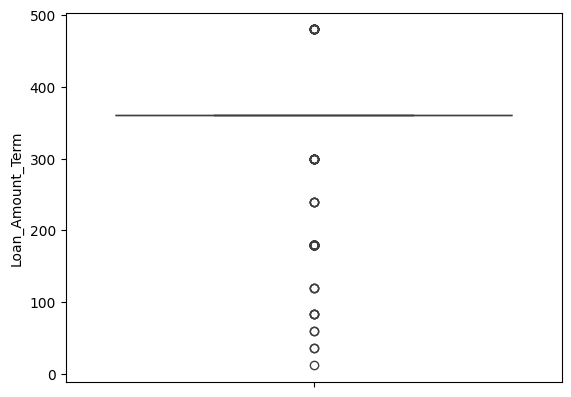

In [681]:
sns.boxplot(df["Loan_Amount_Term"])

<Axes: ylabel='ApplicantIncome'>

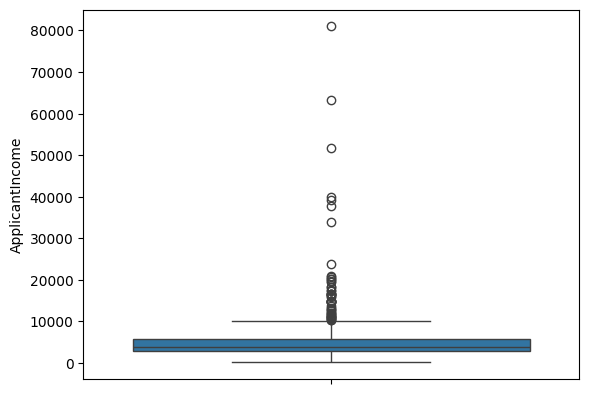

In [682]:
sns.boxplot(df["ApplicantIncome"])

In [683]:
df["CoapplicantIncome"].max()

np.float64(41667.0)

<Axes: ylabel='CoapplicantIncome'>

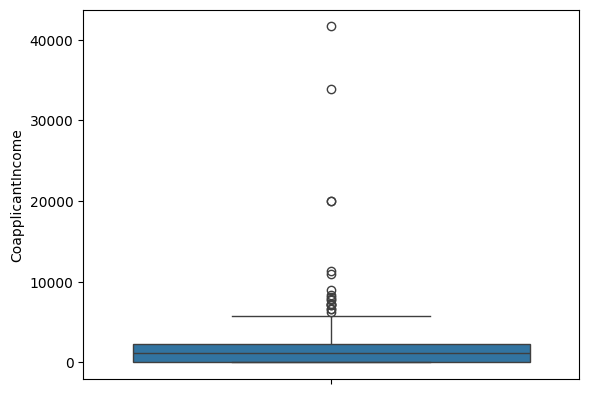

In [684]:
sns.boxplot(df["CoapplicantIncome"])

### Encoding

In [685]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Label Encoding on Dependent Column

In [686]:
from sklearn.preprocessing import LabelEncoder

In [687]:
label = LabelEncoder()

In [688]:
label

LabelEncoder()

In [689]:
label.fit(df["Loan_Status"])

LabelEncoder()

In [690]:
label.transform(df["Loan_Status"])

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [691]:
ary = label.transform(df["Loan_Status"])

In [692]:
ary

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [693]:
label.classes_

array(['N', 'Y'], dtype=object)

In [694]:
df["Loan_Status"].map(lambda x: 0 if x == 'N' else 1)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [695]:
df["Loan_Status"] = df["Loan_Status"].map(lambda x: 0 if x == 'N' else 1)

In [696]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [697]:
df["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [698]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [699]:
df["Dependents"].map(lambda x: 3 if x == '3+' else int(x))

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

Other Method to convert Dependants column to Integer

In [700]:
df["Dependents"].replace("3+", 3, inplace=True)

In [701]:
df["Dependents"] = df["Dependents"].astype("int")

In [702]:
df["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [703]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Get Dummies

In [704]:
pd.get_dummies(df, drop_first = True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,False,False,False,False,False,False
610,3,4106,0.0,40.0,180.0,1.0,1,True,True,False,False,False,False
611,1,8072,240.0,253.0,360.0,1.0,1,True,True,False,False,False,True
612,2,7583,0.0,187.0,360.0,1.0,1,True,True,False,False,False,True


In [705]:
df = pd.get_dummies(df, drop_first = True)

In [706]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True


In [707]:
df.replace([True, False], [1, 0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\1049764432.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([True, False], [1, 0], inplace=True)


In [708]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1


### Data Separation

In [709]:
X = df.drop("Loan_Status", axis=1)

In [710]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0
610,3,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1


In [711]:
y = df["Loan_Status"]

In [712]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Imbalance

<Axes: xlabel='Loan_Status'>

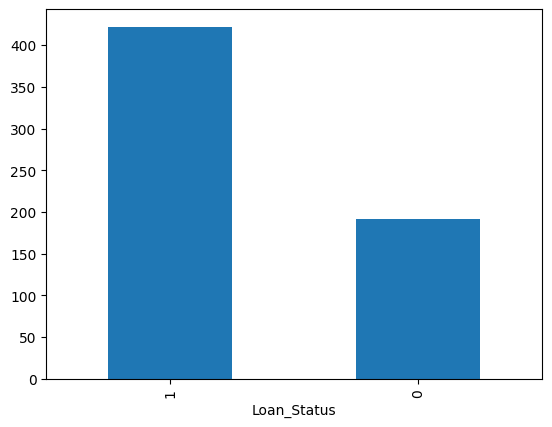

In [713]:
y.value_counts().plot(kind='bar')

In [714]:
from imblearn.over_sampling import RandomOverSampler

In [715]:
ros = RandomOverSampler()

In [716]:
X_ros, y_ros = ros.fit_resample(X, y)

In [717]:
X_ros.shape

(844, 12)

In [718]:
X_ros.value_counts()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban
0           14683            2100.0             304.0       360.0             1.0             1            1            0                       0                  0                        0                      7
            3750             0.0                113.0       480.0             1.0             1            0            0                       0                  0                        1                      6
1           2014             2925.0             113.0       360.0             1.0             1            1            0                       0                  0                        1                      6
            4283             3000.0             172.0       84.0              1.0             1            1            0                       0        

In [719]:
y_ros.shape

(844,)

In [720]:
y_ros.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

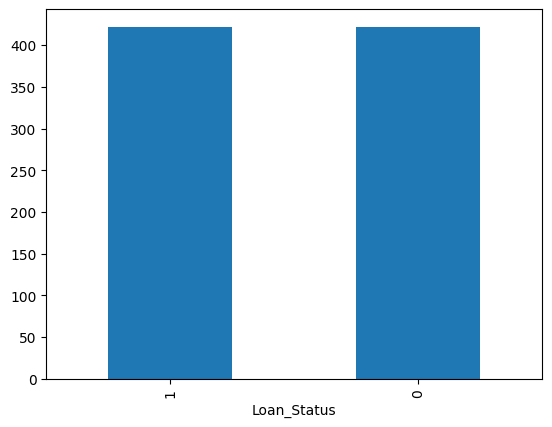

In [721]:
y_ros.value_counts().plot(kind='bar')

### Data Splitting

In [722]:
from sklearn.model_selection import train_test_split

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.20, random_state = 73)

In [724]:
X_train.shape

(675, 12)

In [725]:
X_test.shape

(169, 12)

In [726]:
X_ros.shape

(844, 12)

In [727]:
y_train.shape

(675,)

In [728]:
y_test.shape

(169,)

In [729]:
y_ros.shape

(844,)

### Model Building

In [730]:
from sklearn.tree import DecisionTreeClassifier

In [731]:
dt = DecisionTreeClassifier()

In [732]:
dt

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [733]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [734]:
dt.score(X_test, y_test)

0.8579881656804734

### Auto Random State

In [735]:
sc_list=[]
for i in range(1000):
    Xtrain,Xtest,ytrain,ytest=train_test_split(X_ros, y_ros, test_size=0.20, random_state=i)
    dt_model = DecisionTreeClassifier()
    dt_model.fit(Xtrain,ytrain)
    sc=dt_model.score(Xtest,ytest)
    sc_list.append(sc)
m=max(sc_list)
print(m)
id=sc_list.index(m)
print(id)

0.9289940828402367
308


### Cross Validation

In [736]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [737]:
dt1 = DecisionTreeClassifier()

In [738]:
dt1

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Normal Cross Validation

In [739]:
score1 = cross_val_score(dt1, X_ros, y_ros, cv = 20, n_jobs = -1)
print(score1)

[0.88372093 0.81395349 0.79069767 0.8372093  0.80952381 0.80952381
 0.83333333 0.83333333 0.83333333 0.95238095 0.9047619  0.9047619
 0.97619048 0.85714286 0.9047619  0.92857143 0.88095238 0.83333333
 0.9047619  0.92857143]


In [740]:
score1.mean()

np.float64(0.8710409745293466)

KFold Cross Validation

In [741]:
kf = KFold(n_splits = 20)

In [742]:
score2 = cross_val_score(dt1, X_ros, y_ros, cv = kf, n_jobs = -1)
score2

array([0.93023256, 0.8372093 , 0.69767442, 0.69767442, 0.88095238,
       0.80952381, 0.80952381, 0.88095238, 0.80952381, 0.76190476,
       0.71428571, 0.88095238, 0.73809524, 0.88095238, 0.83333333,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [743]:
score2.mean()

np.float64(0.8581395348837209)

Stratified KFold Cross Validation

In [744]:
skf = StratifiedKFold(n_splits = 20)

In [745]:
score3 = cross_val_score(dt1, X_ros, y_ros, cv = skf, n_jobs = -1)
score3

array([0.90697674, 0.81395349, 0.76744186, 0.79069767, 0.80952381,
       0.85714286, 0.83333333, 0.80952381, 0.80952381, 0.92857143,
       0.92857143, 0.9047619 , 0.97619048, 0.85714286, 0.9047619 ,
       0.95238095, 0.92857143, 0.83333333, 0.9047619 , 0.9047619 ])

In [746]:
score3.mean()

np.float64(0.8710963455149502)

### Accuracy Score

In [747]:
from sklearn.metrics import accuracy_score

In [748]:
dt.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [749]:
y_pred = dt.predict(X_test)

In [750]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [751]:
accuracy_score(y_test, y_pred)

0.8579881656804734

### Auto ML

In [752]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [753]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
log = LogisticRegression()
knc = KNeighborsClassifier()
svc = SVC()

In [754]:
models = [dtc, rfc, abc, gbc, log, knc, svc]
models

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 SVC()]

Auto ML with Normal Cross Validation

In [755]:
for m in models:
    scores = cross_val_score(m, X_ros, y_ros, cv = 20, n_jobs = -1)
    scores.mean()
    print(m, "==>", scores.mean())

DecisionTreeClassifier() ==> 0.8829180509413067
RandomForestClassifier() ==> 0.9111849390919158
AdaBoostClassifier() ==> 0.7179125138427463
GradientBoostingClassifier() ==> 0.8272425249169435
LogisticRegression() ==> 0.6944352159468438
KNeighborsClassifier() ==> 0.6079457364341084
SVC() ==> 0.49869878183831673


Auto ML with KFold Cross Validation

In [756]:
for m in models:
    kf = KFold(n_splits = 20)
    scores = cross_val_score(m, X_ros, y_ros, cv = kf, n_jobs = -1)
    scores.mean()
    print(m, "==>", scores.mean())

DecisionTreeClassifier() ==> 0.8557308970099669
RandomForestClassifier() ==> 0.9136212624584716
AdaBoostClassifier() ==> 0.7105758582502768
GradientBoostingClassifier() ==> 0.8094407530454042
LogisticRegression() ==> 0.6927740863787375
KNeighborsClassifier() ==> 0.6019656699889258
SVC() ==> 0.3478405315614618


Auto ML with Stratified KFold Cross Validation

In [757]:
for m in models:
    skf = StratifiedKFold(n_splits = 20)
    scores = cross_val_score(m, X_ros, y_ros, cv = skf, n_jobs = -1)
    scores.mean()
    print(m, "==>", scores.mean())

DecisionTreeClassifier() ==> 0.8782115171650056
RandomForestClassifier() ==> 0.9088593576965668
AdaBoostClassifier() ==> 0.7179125138427463
GradientBoostingClassifier() ==> 0.8284330011074198
LogisticRegression() ==> 0.6944352159468438
KNeighborsClassifier() ==> 0.6079457364341084
SVC() ==> 0.49869878183831673


### Hyper Parameter Tuning

In [758]:
import time

In [759]:
dt_new = DecisionTreeClassifier()

In [760]:
for n in ["best", "random"]:
    for w in ["entropy", "gini"] : 
        print(n, w)
        time.sleep(1)

best entropy
best gini
random entropy
random gini


In [761]:
for n in ["best", "random"]:
    for w in ["entropy", "gini"] :
        dt_hp = DecisionTreeClassifier(splitter=n, criterion=w)
        dt_hp.fit(X_ros, y_ros)
        s = dt_hp.score(X_test, y_test)
        print(n,"-" ,w, "==>",s)

best - entropy ==> 1.0
best - gini ==> 1.0
random - entropy ==> 1.0
random - gini ==> 1.0


### Grid Search CV

In [762]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [763]:
dtt = DecisionTreeClassifier()

In [764]:
param_grid = {
                "splitter" : ["best", "random"],
                "criterion" : ["entropy","gini"],
                "max_depth" : [5,6,7,8],
                "min_samples_split" : [2,3,4,5]
                        }

In [765]:
param_grid

{'splitter': ['best', 'random'],
 'criterion': ['entropy', 'gini'],
 'max_depth': [5, 6, 7, 8],
 'min_samples_split': [2, 3, 4, 5]}

In [766]:
gridcv = GridSearchCV(dt_new, param_grid= param_grid, n_jobs= -1, cv = 20)

In [767]:
gridcv

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,20
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [768]:
gridcv.fit(X_ros, y_ros)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,20
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [769]:
gridcv.best_score_

np.float64(0.7846899224806203)

In [770]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 4,
 'splitter': 'best'}

In [771]:
gridcv.cv_results_

{'mean_fit_time': array([0.01404746, 0.0108744 , 0.01691043, 0.00873268, 0.00951837,
        0.00600153, 0.00790547, 0.00725131, 0.01633909, 0.0091197 ,
        0.01090082, 0.00955721, 0.00912607, 0.00581259, 0.0101597 ,
        0.00694441, 0.01857088, 0.02809848, 0.02609167, 0.01531337,
        0.01283607, 0.00736074, 0.01572249, 0.00871583, 0.01076103,
        0.00633773, 0.01251695, 0.01055984, 0.01465659, 0.00766063,
        0.01127309, 0.00823265, 0.01124051, 0.00540324, 0.00837269,
        0.00599449, 0.00722839, 0.00581067, 0.00783176, 0.00599074,
        0.00720152, 0.00653189, 0.0074648 , 0.00653623, 0.00960836,
        0.00726886, 0.01263525, 0.01501837, 0.02037284, 0.009267  ,
        0.01781542, 0.01655735, 0.0172614 , 0.00819067, 0.01126997,
        0.00763211, 0.01147643, 0.00625334, 0.00895507, 0.00760372,
        0.01223209, 0.00756088, 0.02524568, 0.01064115]),
 'std_fit_time': array([0.01713818, 0.00889692, 0.00949538, 0.00651023, 0.00312696,
        0.0014325 , 0.001

In [772]:
pd.DataFrame(gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014047,0.017138,0.007437,0.016066,entropy,5,2,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.714286,0.666667,0.833333,0.785714,0.690476,0.857143,0.714286,0.738289,0.062944,35
1,0.010874,0.008897,0.012702,0.016931,entropy,5,2,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.697674,...,0.619048,0.642857,0.738095,0.761905,0.785714,0.761905,0.619048,0.728682,0.071846,52
2,0.016910,0.009495,0.006236,0.008025,entropy,5,3,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.714286,0.666667,0.833333,0.785714,0.690476,0.857143,0.714286,0.734718,0.061716,42
3,0.008733,0.006510,0.004699,0.002030,entropy,5,3,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.651163,...,0.619048,0.619048,0.761905,0.738095,0.714286,0.809524,0.714286,0.714590,0.064712,57
4,0.009518,0.003127,0.004558,0.003209,entropy,5,4,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,...,0.714286,0.666667,0.833333,0.785714,0.690476,0.857143,0.714286,0.737099,0.063609,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.007604,0.004025,0.003801,0.001489,gini,8,3,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.720930,...,0.714286,0.714286,0.761905,0.880952,0.833333,0.761905,0.714286,0.762043,0.061676,14
60,0.012232,0.006812,0.005476,0.005615,gini,8,4,best,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.744186,...,0.714286,0.857143,0.857143,0.785714,0.761905,0.928571,0.738095,0.784690,0.077589,1
61,0.007561,0.002753,0.008556,0.007690,gini,8,4,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.744186,...,0.738095,0.714286,0.857143,0.761905,0.833333,0.714286,0.642857,0.751357,0.065821,20
62,0.025246,0.020773,0.008186,0.008590,gini,8,5,best,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.744186,...,0.714286,0.857143,0.809524,0.785714,0.761905,0.928571,0.738095,0.769241,0.068016,5


In [773]:
df_test = pd.read_csv(r"C:\PGA\Python\Machine Learning\Decision Tree\test_loan.csv")

In [774]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [775]:
df_test.drop(['Loan_ID'], axis=1, inplace=True)

In [776]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [777]:
df_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [778]:
df_test.isna().sum().sum()

np.int64(84)

In [779]:
df_test.dropna(inplace=True)

In [780]:
df_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [781]:
df_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [782]:
df_test["Dependents"].dtype

dtype('O')

In [783]:
df_test["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [784]:
df_test["Dependents"].replace('3+', 3).astype("int")

0      0
1      1
2      2
4      0
5      0
      ..
361    1
362    3
363    0
365    0
366    0
Name: Dependents, Length: 289, dtype: int64

In [785]:
df_test["Dependents"] = df_test["Dependents"].replace('3+', 3).astype("int")

<Axes: >

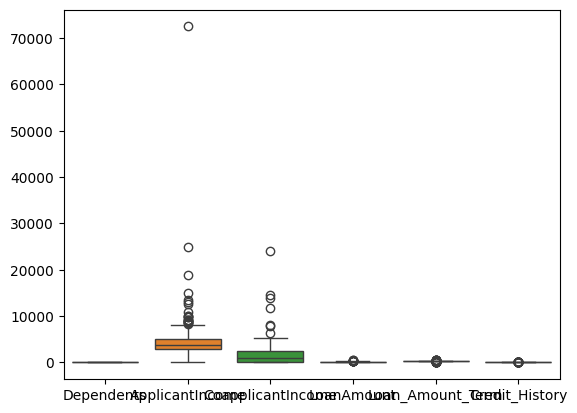

In [786]:
sns.boxplot(df_test)

In [787]:
pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\3116977843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [788]:
df_test = pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\4276034432.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = pd.get_dummies(df_test, drop_first=True).replace([True, False], [1, 0])


In [789]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [790]:
dt.predict(df_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0])

In [791]:
res = dt.predict(df_test)

In [792]:
df_test["LS_Predicted"] = res

In [793]:
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LS_Predicted
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0
5,0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,2269,2167,99.0,360.0,1.0,1,1,0,0,1,0,1
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0,0
